# Data Pre-processing and Exploration
____

The primary goal of this notebook is to prepare our dataset for subsequent analysis and modeling. In doing so, we will conduct data preprocessing tasks to enhance data quality, remove duplicates, handle missing values, and address outliers. Additionally, we will perform exploratory analysis to gain insights into the dataset's characteristics.

As part of our data preprocessing journey, we will introduce the concept of a data preprocessing pipeline. This pipeline will help streamline and organize the various data preparation tasks. While we'll briefly mention the pipeline here, a more detailed explanation of its components and purpose will be provided in the summary overview section.

Let's get started with the data preprocessing and exploratory analysis to ensure that our dataset is well-prepared for further analysis and modeling.

## Importing data

In [1]:
# %pip install opendatasets plotly matplotlib seaborn sklearn --quiet

In [2]:
# imports
import opendatasets as od
import os
import pandas as pd
import plotly.express as px
import seaborn as sns
import shutil

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_rows', 20)

In [3]:
data_dir = os.path.join('.','data','raw')
os.makedirs(data_dir, exist_ok=True)
dat_url = 'https://www.kaggle.com/datasets/sidharth178/car-prices-dataset'

In [4]:
# with scikit learn
od.download(dat_url, data_dir)

100%|██████████| 592k/592k [00:00<00:00, 4.03MB/s]

In [5]:
# Specify the source and target directories
source_directory = os.path.join(data_dir, 'car-prices-dataset')
target_directory = data_dir

# List all files in the source directory
files_in_source_directory = os.listdir(source_directory)

# Move files from the source to the target directory
for filename in files_in_source_directory:
    source_file = os.path.join(source_directory, filename)
    target_file = os.path.join(target_directory, filename)
    shutil.move(source_file, target_file)

# Remove the old source directory
os.rmdir(source_directory) 

print("Files moved to target directory:", target_directory)
print("Source directory removed:", source_directory)


Files moved to target directory: .\data\raw
Source directory removed: .\data\raw\car-prices-dataset


In [6]:
path = os.path.join(data_dir,"train.csv")
df = pd.read_csv(path)

## Data Exploration

In this step check for:
* Missing values
* Incorrect data type
* Duplicate observations
* Compare the scales of the data.

In [7]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


### Handling Duplicates

In [8]:
# Are the ids unique
print(f"There are {df.shape[0]} observations and {df.loc[:,'ID'].nunique()} unique IDs")

There are 19237 observations and 18924 unique IDs


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

The information on the dataframe states that there are no null values in any of the columns. However, the number of unique ids is 18924 which is less than the total number of observations 19237. This indicates that we might have some duplicate observations.

In [10]:
print(f"There are {df.duplicated().sum()} duplicate values. Which we get directly from the duplicate IDs {len(df) - df.loc[:,'ID'].nunique()}")

There are 313 duplicate values. Which we get directly from the duplicate IDs 313


In [11]:
df[df.duplicated(keep=False)].sort_values('ID')

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
5754,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
7269,35464629,7840,1111,HONDA,FIT,2012,Hatchback,No,Petrol,1.3,108000 km,4.0,Automatic,Front,04-May,Right-hand drive,Blue,6
1107,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
6732,36559154,19726,-,MERCEDES-BENZ,Sprinter 411,2002,Goods wagon,No,Diesel,2.2 Turbo,280000 km,4.0,Manual,Rear,02-Mar,Left wheel,White,2
9990,41770767,11917,-,NISSAN,Murano,2004,Jeep,Yes,CNG,3.5,233600 km,6.0,Variator,4x4,04-May,Left wheel,Silver,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15880,45815564,9408,-,MERCEDES-BENZ,E 240,2000,Sedan,No,Petrol,2.4,252000 km,6.0,Manual,Rear,04-May,Left wheel,Black,4
14469,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
3756,45815994,4077,751,HYUNDAI,Sonata,2013,Sedan,Yes,Petrol,2.4,111930 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12
8730,45816384,49237,730,HYUNDAI,Tucson,2016,Jeep,Yes,Petrol,1.6,27000 km,4.0,Tiptronic,4x4,04-May,Left wheel,White,12


The line of code below removes the duplicates observations

In [12]:
df.drop_duplicates(inplace=True)
print(f"After removing duplicates there are {df.shape[0]} observations")

After removing duplicates there are 18924 observations


### Splitting Data

The data needs to be split to prevent data leakage, since the chronological order of the data is not valid a random split will be used.

Before splitting since each ID represents a unique observation, ID is set as the index of the dataframe.

In [13]:
df.set_index("ID", inplace=True)
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
ID,,,,,,,,,,,,,,,,,
45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


Since this is a Kaggle data set there is a test set so the split needs to contain only a train and a validation set.

The features, values used to make the prediction, are labelled `X` and the target, the value predicted, is labelled `y`. In this case the target is `Price` and the other columns are the features.

In [14]:
y = df["Price"]
X = df.drop("Price", axis=1)

In [15]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
val_df = pd.concat([X_val, y_val], axis=1)

### Pre-Processing

#### Data Quality

Start off by visualizing the features.

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15139 entries, 45732352 to 45523527
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Levy              15139 non-null  object 
 1   Manufacturer      15139 non-null  object 
 2   Model             15139 non-null  object 
 3   Prod. year        15139 non-null  int64  
 4   Category          15139 non-null  object 
 5   Leather interior  15139 non-null  object 
 6   Fuel type         15139 non-null  object 
 7   Engine volume     15139 non-null  object 
 8   Mileage           15139 non-null  object 
 9   Cylinders         15139 non-null  float64
 10  Gear box type     15139 non-null  object 
 11  Drive wheels      15139 non-null  object 
 12  Doors             15139 non-null  object 
 13  Wheel             15139 non-null  object 
 14  Color             15139 non-null  object 
 15  Airbags           15139 non-null  int64  
 16  Price             15139 non-nu

Overview
____
1.  Price is an integer which is fine
2.  Levy is an object but it should be an integer
3.  Manufacturer      is an object 
4.  Model            is an object 
5.  Prod. year       is an int64  but should be a date representation 
6.  Category         is an object 
7.  Leather interior is an object should be a category
8.  Fuel type        is an object should also be a category
9.  Engine volume    is an object should be a decimal digit
10. Mileage         is an object should be a digit
11. Cylinders       is an float64
12. Gear box type   is an object should be a category
13. Drive wheels    is an object should be a category
14. Doors           is an object should be a date
15. Wheel           is an object should be a category
16. Color           is an object should be a category
17. Airbags         is an int64 

##### Car Price
In the data preprocessing, outliers are removed from the target variable "Price" to enhance the quality of the model training.

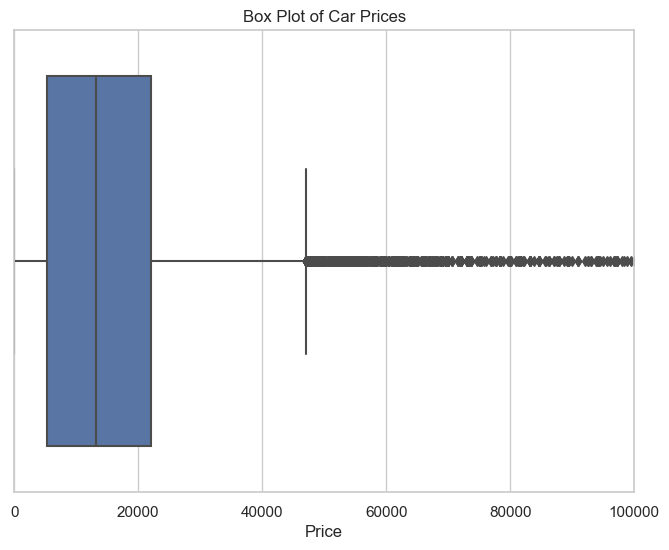

In [17]:
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df["Price"])
plt.xlabel("Price")
plt.title("Box Plot of Car Prices")
plt.xlim(0, 100000) 
plt.show()

As seen above the distribution of the car prices is highly skewed to the right; meaning the majority of cars are of lower prices but there are some cars with very high prices.

In [18]:
train_df["Price"].describe()

count    1.513900e+04
mean     1.892078e+04
std      2.146141e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.200000e+04
max      2.630750e+07
Name: Price, dtype: float64

Per the sample the lowest car price is  `$1`, the average car price is `$189,000` and the highest car price is `$26,307,500`

The first quartile contains cars that cost less than $5,331 this seems like a reasonable price. However, is strange for a car to cost $1, as such a look at cars that cost less than the first quartile is essential. 

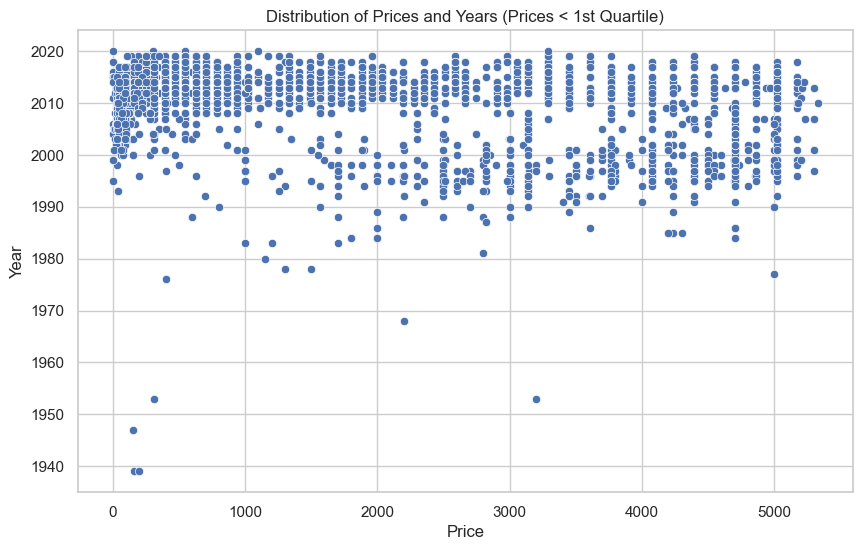

In [19]:
first_quantile = train_df["Price"].quantile(0.25)
filtered_data = train_df[train_df["Price"] < first_quantile]

# scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=filtered_data, x="Price", y="Prod. year")
plt.title("Distribution of Prices and Years (Prices < 1st Quartile)")
plt.xlabel("Price")
plt.ylabel("Year")
plt.show()

The plot above sbows that no specific year is responsible for the low prices. Further improvements can be made to this analysis but this project will treat car prices less than $1,000 as outliers ($1,000 is based on a scientific guess).

In [20]:
less_than_1000_percentage = 100*len(train_df[train_df['Price'] < 1000])/len(train_df['Price'])
print(f"The percentage of cars that cost less than $1,000 is {less_than_1000_percentage:.2f}%")

The percentage of cars that cost less than $1,000 is 13.34%


**Removing Unrealistic Low Prices**

I identified car prices below $1000 as unrealistic outliers. Such low prices are likely to be data entry errors or anomalies that could introduce noise into the model. By removing these outliers, the model focuses on learning from realistic and meaningful data points.

**Retaining Extremely High Prices**

Conversely, I decided to retain extremely high car prices, such as those exceeding millions of dollars. While these prices are outliers, they represent unique instances of luxury or collector's items. Retaining high-value outliers allows our model to account for these exceptional cases, enhancing its robustness and versatility.

By taking this balanced approach to outlier removal, I aim to build a model that accurately represents the general trend while being capable of handling various real-world scenarios.


In [21]:
train_df = train_df[train_df['Price'] >= 1000]

In [22]:
print(f"After removing the outliers in the price column the training dataframe has {train_df.shape[0]} rows")

After removing the outliers in the price column the training dataframe has 13119 rows


##### Levy

The levy column is of type object hoever it contains digits(integers) similar to the price column.
<br/><i>Although I think both columns should be of floating point types(numbers with fractional parts)</i>

To try to get an idea of why the values are saved as objects some values printed

In [23]:
train_df["Levy"].sort_values().head()

ID
45792424    -
45782173    -
45791262    -
45610241    -
45801674    -
Name: Levy, dtype: object

In [24]:
(train_df["Levy"] == "-").sum()

4283

There are 4283 missing levies with `-` inputted in their slots.

In [25]:
train_df["Levy"].replace("-", None, inplace=True)

For the purpose of this analysis I assume the Levy columns missing are missing completely at random and the missing values will be replaced with the mean value.

In [26]:
has_negative = train_df['Levy'].str.contains("-", na=False).any()
print(f"There are existing Levy values containing negative values: {has_negative}")

There are existing Levy values containing negative values: False


In [27]:

# Assuming 'Levy' column contains strings, convert it to numeric (integer) type
train_df['Levy'] = pd.to_numeric(train_df['Levy'], errors='coerce')

# Group by 'Prod. year' and calculate the mean Levy for each year
mean_levy_by_year = train_df.groupby('Prod. year')['Levy'].mean()
mean_levy_by_year.fillna(0, inplace = True)

# Iterate through unique years and fill missing Levies with the corresponding mean Levy
for year in train_df['Prod. year'].unique():
    mask = (train_df['Prod. year'] == year) & train_df['Levy'].isnull()
    train_df.loc[mask, 'Levy'] = mean_levy_by_year[year]

# Convert 'Levy' column back to integer (if needed)
train_df['Levy'] = train_df['Levy'].astype(int)

In [28]:
fig = px.scatter(train_df, x='Levy', y='Prod. year', title='Plot of Levy vs. Production Year')
fig.show()

There seems to be some levies with a value of 0.

In [29]:
zero_levies = train_df[train_df['Prod. year']<1991].shape[0]
print(f"There are {zero_levies} observations of levies with the value of zero in the sample")

There are 53 observations of levies with the value of zero in the sample


Since there are so few observations no further processing will be done for this column.

##### Manufacturer

In [30]:
print(f"There are {train_df['Manufacturer'].nunique()} unique manufacturers")

There are 63 unique manufacturers


In [31]:
px.histogram(train_df, x='Manufacturer', title='Distribution of Manufacturers')

Hyundai is the most common manufacturer with over 2500 vehicles.

<br/>The manufacturers need to be converted to categorical variables and encoded as integers. Label encoding is used, although the manufacturers do not have an ordinal attribute there are too many categories to opt for another encoding technique for this project.

In [32]:
encoder = LabelEncoder()
encoder.fit(train_df["Manufacturer"])
train_df["Manufacturer"] = encoder.transform(train_df["Manufacturer"])

##### Model

In [33]:
print(f"There are {train_df['Model'].nunique()} unique models")

There are 1357 unique models


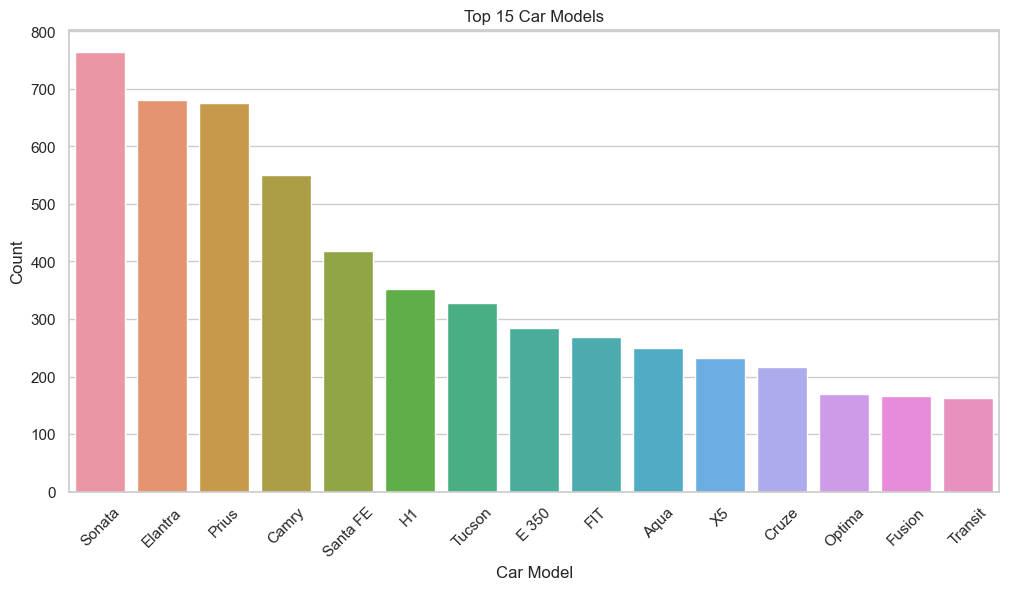

In [34]:
top_n = 15
top_models = train_df['Model'].value_counts().head(top_n).index

plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Model', order=top_models)
plt.xticks(rotation=45)
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.title(f'Top {top_n} Car Models')
plt.show()

The Sontana is the most common models with over 700 cars.

The models are label encoded for a similar reason as the manufacturer column

In [35]:
encoder = LabelEncoder()
train_df['Model'] = encoder.fit_transform(train_df['Model'])

##### Prod. year

In [36]:
print(f"The production years for cars in this sample ranges from {train_df['Prod. year'].min()} - {train_df['Prod. year'].max()}")

The production years for cars in this sample ranges from 1953 - 2020


Currently the years are represented as integers, this is sufficient for this project as there will be no date time operations.

In [37]:
train_97_quantile = train_df[train_df['Price'] <= train_df['Price'].quantile(0.97)]
px.scatter(train_97_quantile, x='Prod. year', y='Price')

##### Category

In [38]:
print(f"There are {train_df['Category'].nunique()} unique car categories")

There are 11 unique car categories


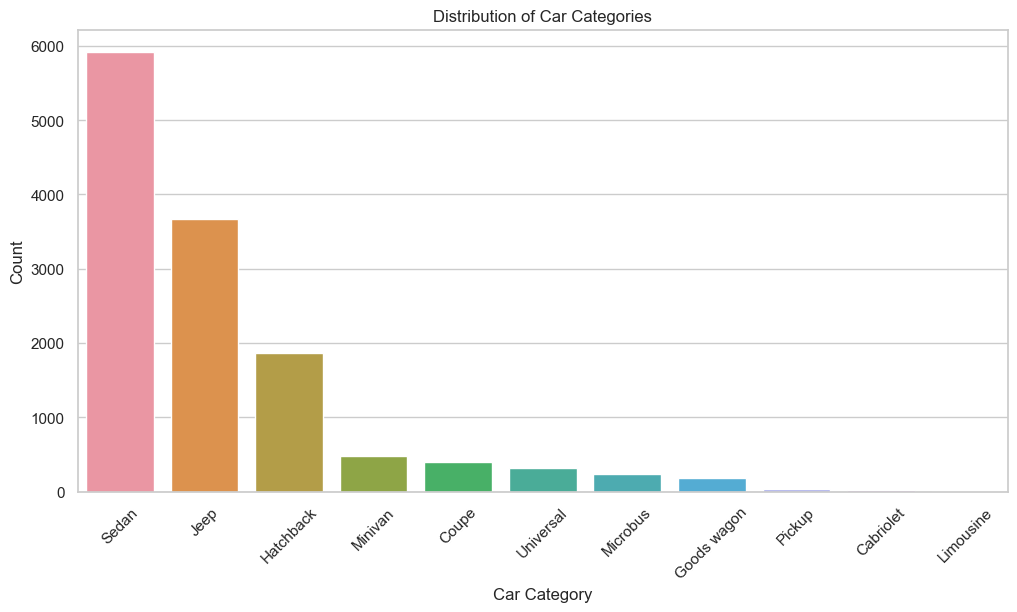

In [39]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Category', order=train_df['Category'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Car Category')
plt.ylabel('Count')
plt.title('Distribution of Car Categories')
plt.show()

Sedans are the most common car category in the sample. Below the car categories are converted to numerical representations.

In [40]:
encoder = LabelEncoder()
train_df['Category'] = encoder.fit_transform(train_df['Category'])

##### Leather interior

In [41]:
train_df['Leather interior'].value_counts()

Yes    9189
No     3930
Name: Leather interior, dtype: int64

This class contains only 2 options Yes/No.

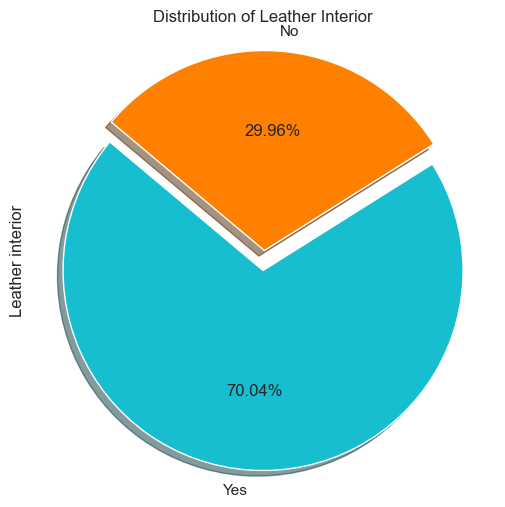

In [42]:
explode = (0.1, 0)
colors = ["#17becf", "#ff7f00"]

plt.figure(figsize=(6, 6))
train_df['Leather interior'].value_counts().plot.pie(colors=colors, 
        autopct='%0.2f%%', 
        explode=explode, 
        shadow=True, startangle=140)
plt.title("Distribution of Leather Interior")
plt.axis('equal') 
plt.show()

In [43]:
fig = px.histogram(train_97_quantile, 
                   x='Price', 
                   marginal='box', 
                   color='Leather interior', 
                   color_discrete_sequence=['#4daf4a', '#f781bf'], 
                   title='Distribution of Car Prices by Leather Interior')
fig.update_layout(bargap=0.1)
fig.show()

In [44]:
train_df['Leather interior'] = train_df['Leather interior'].astype('category').cat.codes

##### Fuel type

In [45]:
print(f"There are {train_df['Fuel type'].nunique()} unique fuel types")

There are 7 unique fuel types


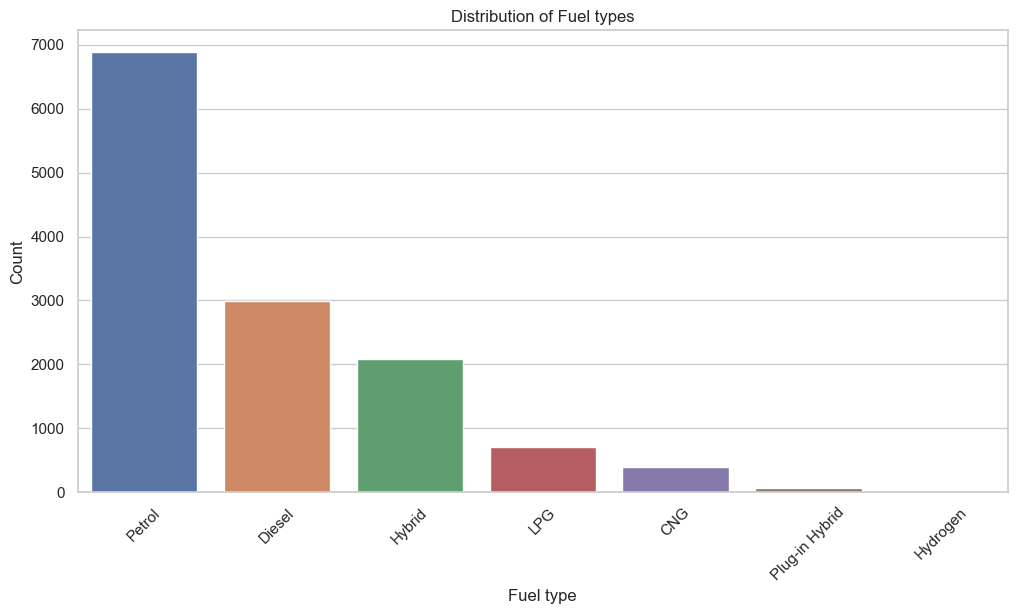

In [46]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Fuel type', order=train_df['Fuel type'].value_counts().index)
plt.xticks(rotation=45)
plt.xlabel('Fuel type')
plt.ylabel('Count')
plt.title('Distribution of Fuel types')
plt.show()

Encoding the different fuel types 

In [47]:
encoder = LabelEncoder()
encoder.fit(train_df["Fuel type"])
train_df["Fuel type"] = encoder.transform(train_df["Fuel type"])

##### Engine volume

In [48]:
train_df.head()

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
ID,,,,,,,,,,,,,,,,,
45732352,639,23,1122,2014,4,1,1,2,151000 km,4.0,Automatic,Front,04-May,Left wheel,Black,4,40976
42285726,768,36,868,2012,4,1,5,4.7 Turbo,167000 km,8.0,Tiptronic,4x4,04-May,Left wheel,Black,10,75266
45796573,1185,54,619,2009,4,0,5,2.5,115000 km,6.0,Automatic,4x4,04-May,Left wheel,Black,12,12544
45758690,738,8,469,2017,9,0,5,1.4 Turbo,44800 km,4.0,Automatic,Front,04-May,Left wheel,Silver,12,17405
45809396,502,21,588,2013,3,1,5,1.5,34682 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4,25365


In [49]:
train_df['Engine volume'].sort_values(ascending=True)

ID
45814922            0
45809261            0
45757531            0
45809887            0
45729847            0
              ...    
45796827    6.3 Turbo
45788165    6.3 Turbo
45813837          6.4
45813777          6.8
45785703          7.3
Name: Engine volume, Length: 13119, dtype: object

In [50]:
train_df['Engine volume'] = pd.to_numeric(train_df['Engine volume'].str.split(' ').str[0], downcast='float', errors='coerce')

In [51]:
print(f"The engine volume are encoded as {train_df['Engine volume'].dtypes}, so nothing else is required")

The engine volume are encoded as float32, so nothing else is required


##### Mileage

Mileage should be converted to its numeric representation

In [52]:
train_df['Mileage'] = train_df['Mileage'].str.replace('km','').astype(int)

In [53]:
# representation in the data
print(f"The milage is encoded as {train_df['Mileage'].dtypes}, so futher type conversion is required")

The milage is encoded as int32, so futher type conversion is required


##### Cylinders

In [54]:
print(f"There are {train_df['Cylinders'].nunique()} unique cylinders of type {train_df['Cylinders'].dtype}")

There are 13 unique cylinders of type float64


In [55]:
train_df['Cylinders'].unique()

array([ 4.,  8.,  6., 10., 12.,  5.,  3.,  1.,  2., 16.,  9.,  7., 14.])

Through data exploration and applying domain knowledge the cylinder types need to be converted to a discrete representation.

In [56]:
train_df['Cylinders'] = train_df['Cylinders'].astype(int)

##### Gear box type

In [57]:
print(f"There are {train_df['Gear box type'].nunique()} unique gear box types")

There are 4 unique gear box types


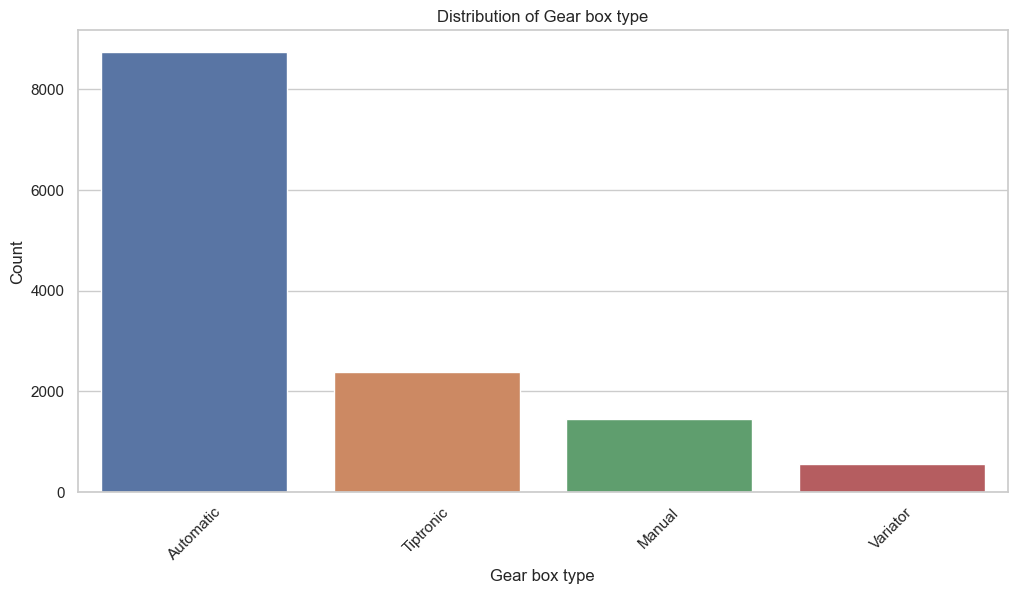

In [58]:
plt.figure(figsize=(12, 6))
sns.countplot(data=train_df, x='Gear box type')
plt.xticks(rotation=45)
plt.xlabel('Gear box type')
plt.ylabel('Count')
plt.title('Distribution of Gear box type')
plt.show()

The gear box type will be label encoded since it is possible that these are not the only options of gear box types available in the population(i.e to make the models created generalizeable)

In [59]:
encoder = LabelEncoder()
train_df["Gear box type"] = encoder.fit_transform(train_df["Gear box type"])

##### Drive wheels

In [60]:
print(f"There are {train_df['Drive wheels'].nunique()} unique Drive wheel types")

There are 3 unique Drive wheel types


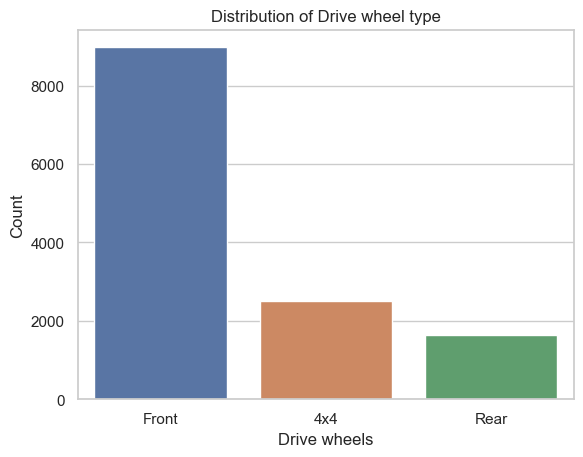

In [61]:
sns.countplot(data=train_df, x='Drive wheels')
plt.xlabel('Drive wheels')
plt.ylabel('Count')
plt.title('Distribution of Drive wheel type')
plt.show()

Encoding the values

In [62]:
train_df = pd.get_dummies(train_df, columns=['Drive wheels'], drop_first=True)

##### Doors

In [63]:
train_df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [64]:
print(f"There are {train_df['Doors'].nunique()} unique Door types")

There are 3 unique Door types


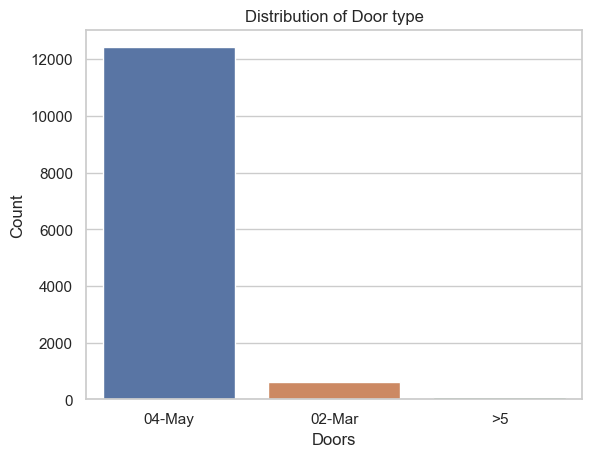

In [65]:
sns.countplot(data=train_df, x='Doors')
plt.xlabel('Doors')
plt.ylabel('Count')
plt.title('Distribution of Door type')
plt.show()

Encoding the door types into numeric values.
____
For this analysis since there are only 3 possible categories of doors
* 2 or 3 `02-Mar`
* 4 or 5 `04-May`
* more than 4 `>5`

The categories will be one-hot encoded, a technique in which each categroy is converted into a seperate column with binary representations.

In [66]:
train_df = pd.get_dummies(train_df, columns=['Doors'], drop_first=True)

##### Wheel

In [67]:
print(F"There are 2 possible steering wheel positions {' and '.join(train_df['Wheel'].unique())}")

There are 2 possible steering wheel positions Left wheel and Right-hand drive


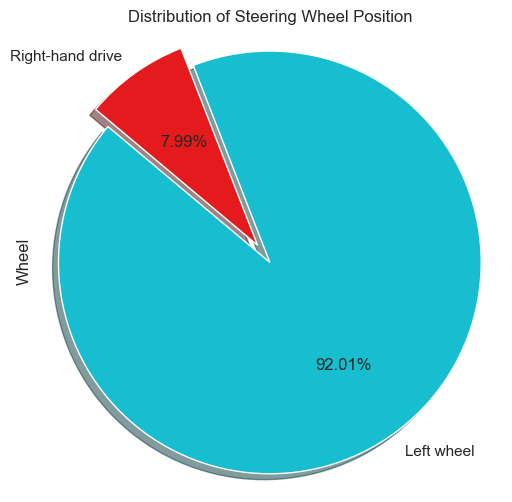

In [68]:
explode = (0.1, 0)
colors = ["#17becf", "#e41a1c"]

plt.figure(figsize=(6, 6))
train_df['Wheel'].value_counts().plot.pie(colors=colors, 
        autopct='%0.2f%%', 
        explode=explode, 
        shadow=True, startangle=140)
plt.title("Distribution of Steering Wheel Position")
plt.axis('equal') 
plt.show()

Encoding the wheel type

In [69]:
train_df['Wheel'] = train_df['Wheel'].astype('category').cat.codes

##### Color

Encoding the color categories

In [70]:
train_df['Color'].unique()

array(['Black', 'Silver', 'Grey', 'Beige', 'White', 'Orange', 'Brown',
       'Red', 'Carnelian red', 'Green', 'Blue', 'Sky blue', 'Yellow',
       'Golden', 'Pink', 'Purple'], dtype=object)

In [71]:
encoder = LabelEncoder()
encoder.fit(train_df["Color"])
train_df["Color"] = encoder.transform(train_df["Color"])

##### Airbags

In [72]:
print(f"The airbags are encoded as {train_df['Airbags'].dtypes}, so nothing else is required")

The airbags are encoded as int64, so nothing else is required


In [73]:
train_df['Airbags'].unique()

array([ 4, 10, 12,  0,  6,  2,  8,  5,  7, 16,  3, 15, 14,  1,  9, 11, 13],
      dtype=int64)

### Data Export and Pipeline Creation

All the columns have been converted to numerical representations

In [74]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13119 entries, 45732352 to 45523527
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Levy                13119 non-null  int32  
 1   Manufacturer        13119 non-null  int32  
 2   Model               13119 non-null  int32  
 3   Prod. year          13119 non-null  int64  
 4   Category            13119 non-null  int32  
 5   Leather interior    13119 non-null  int8   
 6   Fuel type           13119 non-null  int32  
 7   Engine volume       13119 non-null  float32
 8   Mileage             13119 non-null  int32  
 9   Cylinders           13119 non-null  int32  
 10  Gear box type       13119 non-null  int32  
 11  Wheel               13119 non-null  int8   
 12  Color               13119 non-null  int32  
 13  Airbags             13119 non-null  int64  
 14  Price               13119 non-null  int64  
 15  Drive wheels_Front  13119 non-null  uint8  

In [75]:
any_non_numeric = train_df.select_dtypes(exclude=['integer', 'float']).any().any()

if any_non_numeric:
    print("There are non-numeric columns in the DataFrame.")
else:
    print("All columns are numeric.")

All columns are numeric.


Exporting the cleaned data 

In [76]:
# exporting the train and test data
data_dir = os.path.join('.','data','cleaned')
os.makedirs(data_dir, exist_ok=True)

train_df.to_csv(os.path.join(data_dir, 'train_data.csv'))
val_df.to_csv(os.path.join(data_dir, 'val_data.csv'))

All the pre-processing steps need to be included in a pipleine for reproducability and clarity.

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, FunctionTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import os

In [78]:
# Define custom transformers for preprocessing steps
class PreprocessLevy(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X["Levy"].replace("-", None, inplace=True)
        
        X['Levy'] = pd.to_numeric(X['Levy'], errors='coerce')
        mean_levy_by_year = X.groupby('Prod. year')['Levy'].mean()
        mean_levy_by_year.fillna(0, inplace=True)
        
        for year in X['Prod. year'].unique():
            mask = (X['Prod. year'] == year) & X['Levy'].isnull()
            X.loc[mask, 'Levy'] = mean_levy_by_year[year]
        
        X['Levy'] = X['Levy'].astype(int)
        return X

# Custom transformer to perform label encoding on specified columns
class LabelEncoderTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, columns=None):
        self.columns = columns
        self.encoders = {}

    def fit(self, X, y=None):
        for col in self.columns:
            le = LabelEncoder()
            le.fit(X[col])
            self.encoders[col] = le
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col, le in self.encoders.items():
            X_copy[col] = le.transform(X_copy[col])
        return X_copy

In [79]:
def preprocessing_pipeline(X):
    """This function performs the pre-processing steps for the features and retuns an numeric representation of all the features which is used to train the model"""
    # Define the columns to be label encoded
    label_encoded_cols = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type','Wheel','Color']

    # Create a preprocessing pipeline
    levy_preprocessing = Pipeline([
        ('preprocess_levy', PreprocessLevy())
    ])
    
    # Define a custom function to convert 'Engine volume' to float
    def engine_volume_to_float(series):
        result = pd.to_numeric(series.str.split(' ').str[0], downcast='float', errors='coerce')
        return pd.DataFrame(result)
    
    # Define a custom function to convert 'Mileage' to int
    def mileage_to_int(series):
        result = series.str.replace('km', '').astype(int)
        return pd.DataFrame(result)
    
    # Create a ColumnTransformer to apply label encoding and custom transformations to specific columns
    column_transformer = ColumnTransformer(
        transformers=[
            ('label_encoding', LabelEncoderTransformer(columns=label_encoded_cols), label_encoded_cols),
            ('engine_volume_to_float', FunctionTransformer(engine_volume_to_float), 'Engine volume'),
            ('mileage_to_int', FunctionTransformer(mileage_to_int), 'Mileage'),
            ('cylinders_to_int', FunctionTransformer(lambda x: x.astype(int)), ['Cylinders']),
            ('one_hot_encoding', OneHotEncoder(drop='first', sparse_output=False), ['Drive wheels','Doors'])
        ],
        remainder='passthrough'  # Keep other columns as-is
    )
    
    # Combine the preprocessing and column transformation steps in a single pipeline
    pipeline = Pipeline([
        ('levy_preprocessing', levy_preprocessing),
        ('column_transform', column_transformer)
    ])
    
    # Fit and transform the preprocessing pipeline on your DataFrame
    processed_X = pipeline.fit_transform(X)
    return processed_X

In [80]:
# Define the DataFrame-based features
dir = os.path.join('.', 'data', 'raw', 'train.csv')
df = pd.read_csv(dir)

# Drop duplicates, set index, and extract target
df.drop_duplicates(inplace=True)
df.set_index("ID", inplace=True)
# remove prices less than $1000
df = df[df['Price'] >= 1000] 
y = df['Price']
X = df.drop("Price", axis=1)

# Create the pre-processing pipeline
processed_X = preprocessing_pipeline(X)

### Summary

Data Preprocessing and Exploratory Analysis Overview
____

In this notebook, we conducted data preprocessing and exploratory analysis to prepare the dataset for further analysis and modeling. Below is an overview of the key steps performed:


Data Preprocessing
1. **Duplicate Removal**: We identified and removed duplicate records to ensure data integrity.

2. **Data Splitting**: The dataset was split into appropriate subsets, such as training, validation, and test sets, as needed for modeling and evaluation.

3. **Outlier Handling**: Outliers were detected and removed using appropriate techniques to improve data quality.

4. **Missing Value Handling**: Missing values were addressed using various imputation methods, ensuring that we retained valuable data.

5. **Data Quality Improvement**: We performed data quality checks, including converting columns to appropriate data types, to enhance the dataset's consistency and suitability for analysis.

Exploratory Analysis
- Additional exploratory analysis was conducted to understand the data's characteristics, relationships, and patterns. Visualizations, summary statistics, and data insights were generated during this phase.


Data Export
- The cleaned dataframe resulting from these preprocessing and exploratory analysis steps was exported to a CSV files in the cleaned data folder. This cleaned datasets will serve as the foundation for further processing and analysis in subsequent notebook(s).

Pipeline Creation
- To condense and streamline all the previous preprocessing steps, we established a data preprocessing pipeline. This pipeline organizes the various data preparation tasks for easy replication and application in future stages of the project.

The data is now well-prepared for feature engineering, modeling, and deeper analysis in subsequent stages of the project.


## Future Improvements

The aim of this notebook was to showcase a regression problem and an approach to preprocessing the data. Some future improvements include:
* Analysis into why there are so many cars with really low prices
* Predictive model for missing levies